In [1]:
#Import des bibliothèques et librairies nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('f_preprocessed_data.csv')

On ajoute quelques étapes de transformation des données pour s'assurer qu'elles seront au bon format.

In [3]:
data.dropna(inplace=True)

In [4]:
data['created_datetime'] = pd.to_datetime(data['created_datetime'])
data['last_modified_datetime'] = pd.to_datetime(data['last_modified_datetime'])

In [5]:
from ast import literal_eval

#On convertit la colonne countries au format liste
data['countries'] = data['countries'].apply(literal_eval)

In [6]:
data.head()

,Unnamed: 0,nutrition-score-fr_100g,created_datetime,last_modified_datetime,product_name,countries,additives_n,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g,main_category
0,0,2.792462,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,Farine de blé noir,[fr],1.0,3.60,1.64,0.32500,310.0,0.5,0.0,0.8,9.00,juice-beverage
1,1,2.792462,2017-03-09 10:35:13+00:00,2017-03-09 10:35:13+00:00,Real Salt Granular,[us],0.0,3.60,1.64,96.15678,310.0,0.5,0.0,0.8,9.00,juice-beverage
2,2,2.104444,2015-06-17 08:45:04+00:00,2015-06-17 10:11:54+00:00,Filet de bœuf,[fr],1.0,3.60,1.64,0.32500,310.0,0.5,0.0,0.8,9.00,filet-de-boeuf
3,3,2.792462,2017-03-09 10:35:30+00:00,2017-03-09 10:35:30+00:00,Organic Small Red Chili Beans,[us],0.0,2.78,22.22,0.17526,699.0,0.5,0.0,44.4,63.89,juice-beverage
4,4,2.792462,2017-03-09 10:35:09+00:00,2017-03-09 10:35:09+00:00,Fine Sea Salt,[us],0.0,3.60,1.64,99.90582,310.0,0.5,0.0,0.8,9.00,juice-beverage


### ANALYSE UNIVARIÉE

Nous allons procéder en différenciant trois types de variables:
   - Les variables quantitatives ;
   - Les variables catégorielles ;
   - Les variables relatives à des dates.

### Variables numériques

VARIABLES NUMERIQUES

On traite à part les variables nutrition-score-fr_100g - qui sera particulièrement importante dans la suite de notre analyse statistique - et additives_n - qui présente des valeurs entières. On traitera ensuite les autres variables numériques ensemble.

In [7]:
data['nutrition-score-fr_100g'].describe()

count    156571.000000
mean          2.859812
std           4.302506
min         -15.000000
25%           1.000000
50%           2.792462
75%           3.720444
max          32.000000
Name: nutrition-score-fr_100g, dtype: float64

/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='Density'>

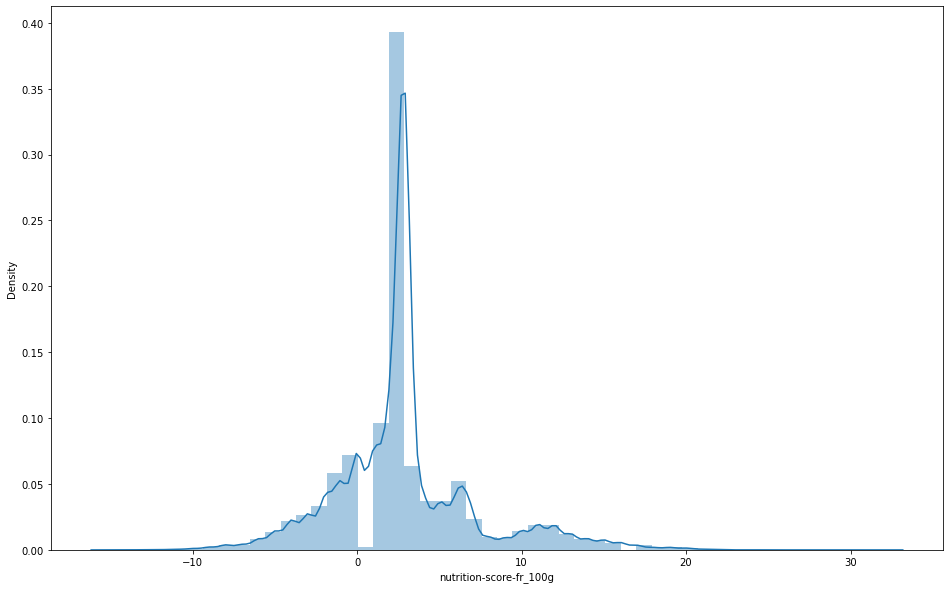

In [8]:
plt.figure(figsize=(16,10))
sns.distplot(data['nutrition-score-fr_100g'])

On observe un pic de densité au niveau de la valeur médiane, qui résulte de notre travail d'imputation. La courbe a été déformée, et il faut être prudent en interprétant ce pic de densité. On voit cependant que les effectifs occupent des valeurs entre -14 et 40, ce qui correspond aux différentes valeurs recouvertes par le nutriscore, comme on l'avait expliqué dans le premier notebook. De plus, on note que les valeurs des effectifs sont très concentrées autour de la médiane (produits de nutriscore moyen) et qu'on a assez peu de valeurs extrêmes (produits avec des nutriscores très mauvais/excellents).

<AxesSubplot:ylabel='additives_n'>

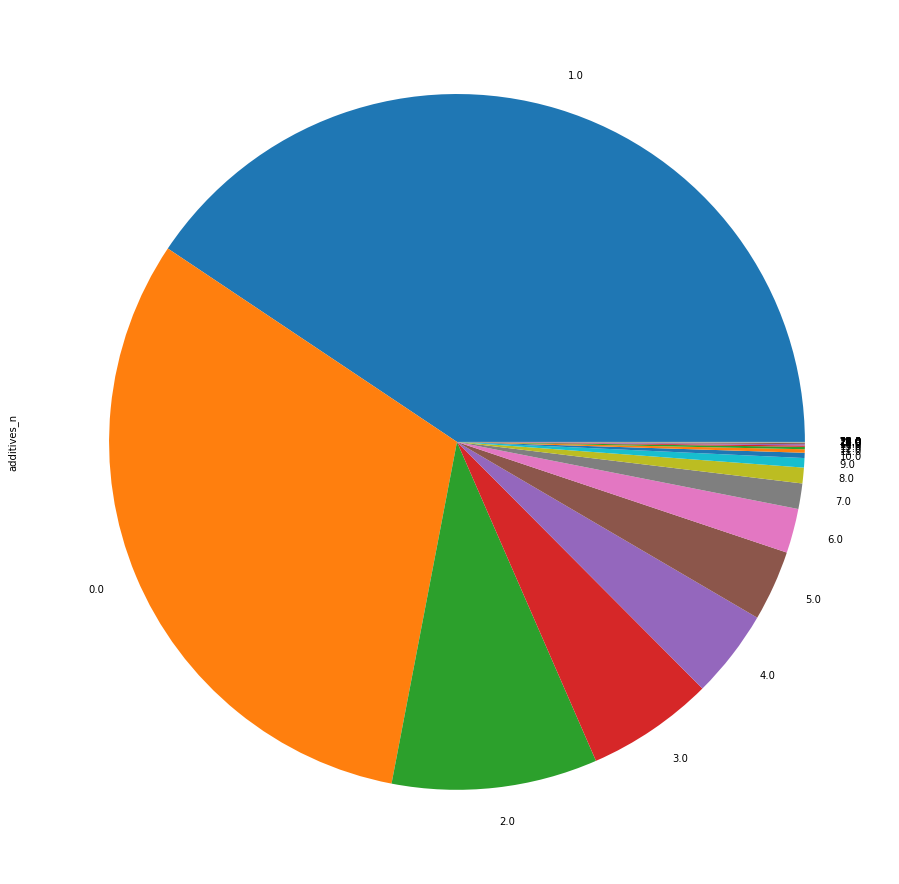

In [9]:
plt.figure(figsize=(20,16))
data['additives_n'].value_counts().plot.pie()

Cette fois, on voit que la très grande majorité des produits possède 1 seul additif, ce qui correspond également à notre stratégie d'imputation par la médiane. On observe ensuite que les produits possédant 0 additifs sont plus nombreux, puis qu'on a de moins en moins de produits à mesure qu'on augmente le nombre d'additifs.

In [10]:
numerical_col = [
                 'sugars_100g',
                 'proteins_100g',
                 'salt_100g',
                 'energy_100g',
                 'fat_100g',
                 'cholesterol_100g',
                 'fiber_100g',
                 'carbohydrates_100g'
                ]

In [11]:
data[numerical_col].describe()

,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g
count,156571.000000,156571.000000,156571.000000,156571.000000,156571.000000,156571.000000,156571.000000,156571.000000
mean,5.874241,3.522077,1.481323,346.304736,2.122337,0.005110,1.153390,10.851250
std,7.685705,5.491259,7.439106,216.353840,4.356215,0.041515,2.572806,10.393076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.310000,0.500000,0.101600,209.000000,0.000000,0.000000,0.700000,6.020000
50%,3.600000,1.640000,0.325000,310.000000,0.500000,0.000000,0.800000,9.000000
75%,6.190000,3.350000,0.800000,444.000000,1.790000,0.000000,0.800000,12.000000
max,100.000000,100.000000,100.000000,900.000000,100.000000,13.846000,100.000000,100.000000


/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

<Figure size 432x288 with 0 Axes>

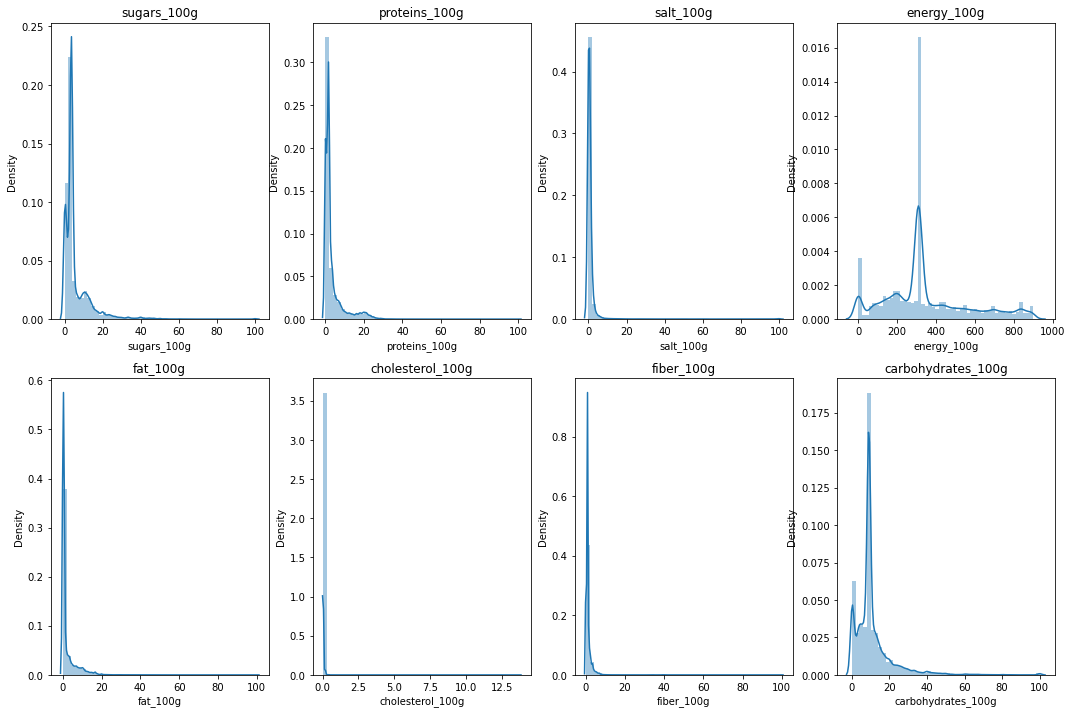

In [12]:
plt.figure()
fig, axes = plt.subplots(2, 4, figsize=(18,12))
for i, e in enumerate(numerical_col):
    sns.distplot(data[e], ax=axes[i//4, i%4]).set_title(f'{e}')

<Figure size 432x288 with 0 Axes>

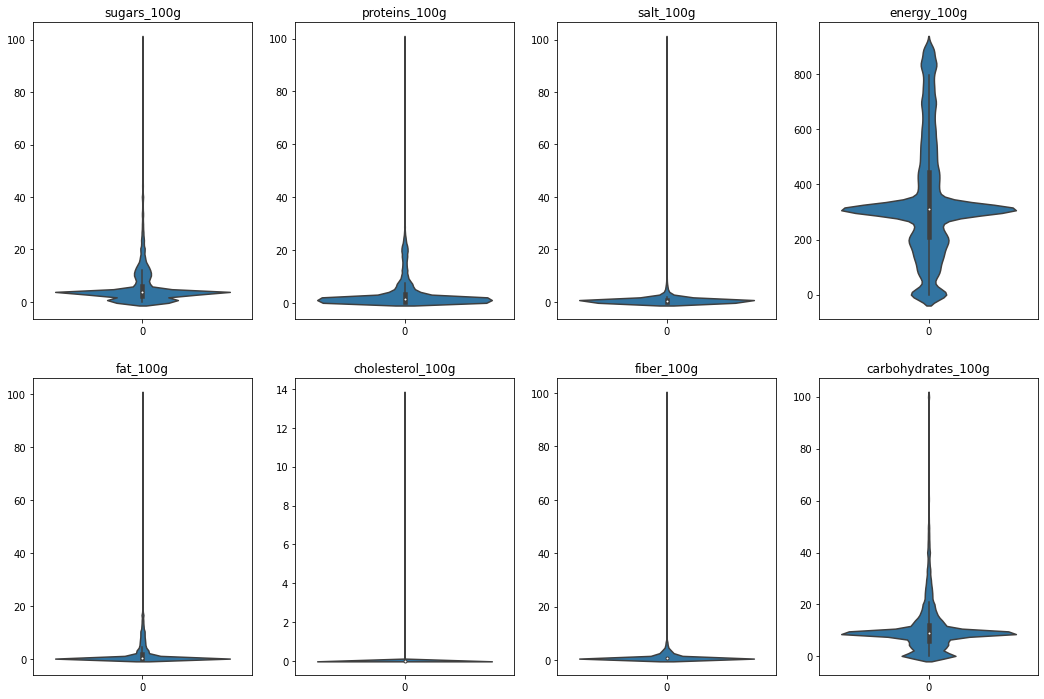

In [13]:
plt.figure()
fig, axes = plt.subplots(2, 4, figsize=(18,12))
for i, e in enumerate(numerical_col):
    sns.violinplot(ax=axes[i//4, i%4], data=data[e]).set_title(f'{e}')

<Figure size 432x288 with 0 Axes>

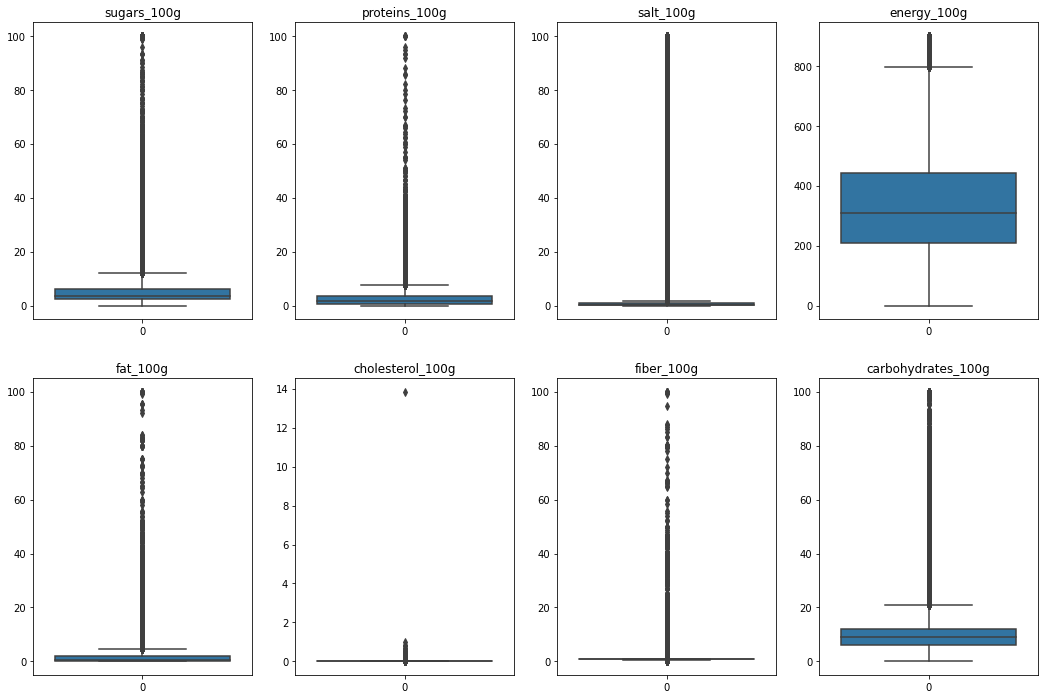

In [14]:
plt.figure()
fig, axes = plt.subplots(2, 4, figsize=(18,12))
for i, e in enumerate(numerical_col):
    sns.boxplot(ax=axes[i//4, i%4], data=data[e]).set_title(f'{e}')


Là encore, on voit que les courbes ont été déformées par l'imputation de la médiane (on observe des distributions avec un pic de densité au niveau de la valeur médiane). Il faut donc être prudent en analysant ces graphiques.

Néanmoins, on peut faire quelques observations et différencier trois types de variables:
- Les variables dont l'écrasante majorité des effectifs se situe autour de 0 (fiber_100g, cholesterol_100g, salt_100g) ; 
- Les variables dont les effectifs sont concentrées autour de faibles valeurs (proteins_100g, fat_100g, sugars_100g) ;
- Les variables dont les effectifs possèdent un très large éventail de valeurs différentes (energy_100g, carbohydrates_100g).

### Variables catégorielles

Les variables concernées sont les variables product_name, countries, et main_category. Le problème qui se pose à nous est qu'on a énormément de valeurs possibles différentes pour ces variables, ce qui ne facilite pas la visualisation des données. Jetons un oeil aux valeurs les plus fréquentes au moyen de worclouds.

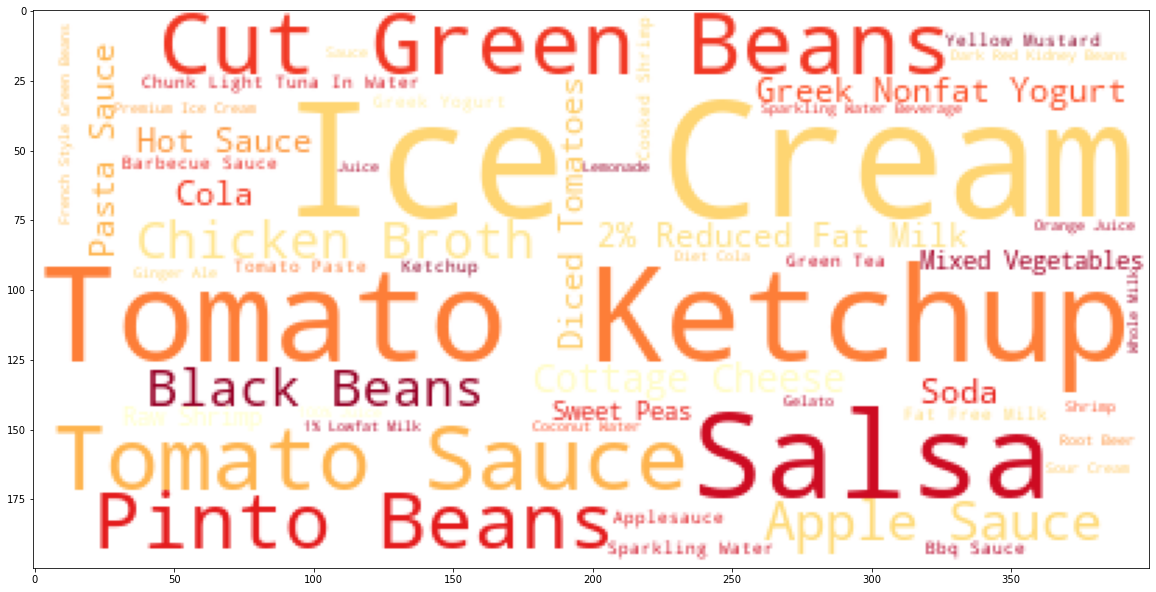

In [15]:
from wordcloud import WordCloud

dic_product = {}

for i, e in enumerate(data['product_name'].value_counts()[0:50]):
    dic_product[data['product_name'].value_counts().index[i]] = e
    
wc_top_product =  WordCloud(background_color='white', colormap='YlOrRd').generate_from_frequencies(dic_product)

plt.figure(figsize=(20, 16))
plt.imshow(wc_top_product)
plt.show()

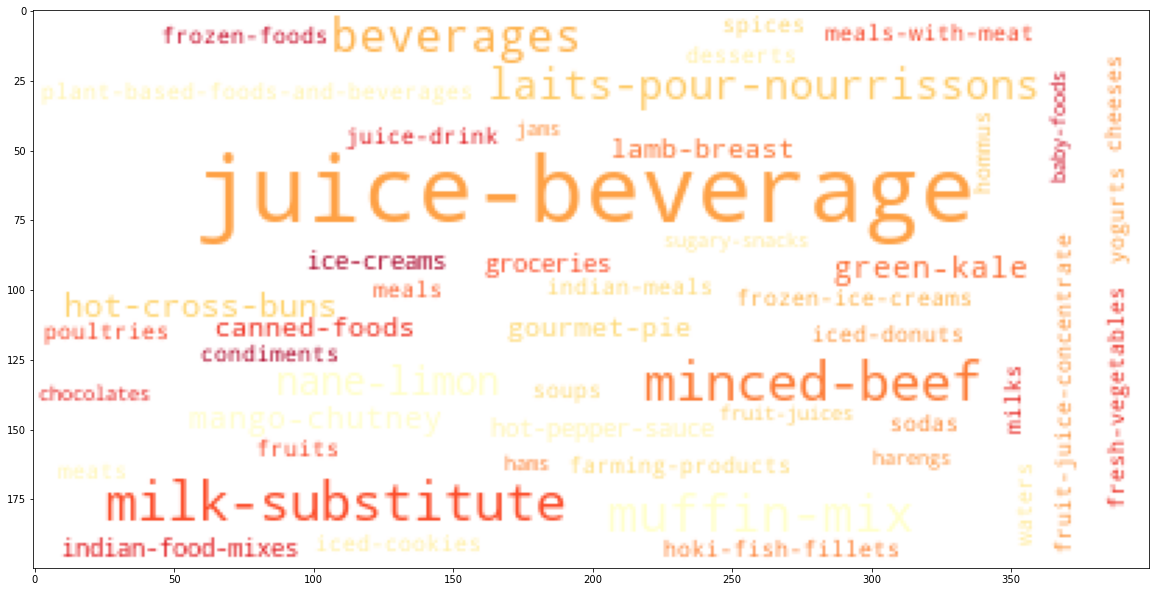

In [16]:
dic_main_category = {}

for i, e in enumerate(data['main_category'].value_counts()[0:50]):
    dic_main_category[data['main_category'].value_counts().index[i]] = e
    
wc_top_main_category =  WordCloud(background_color='white', colormap='YlOrRd').generate_from_frequencies(dic_main_category)

plt.figure(figsize=(20, 16))
plt.imshow(wc_top_main_category)
plt.show()

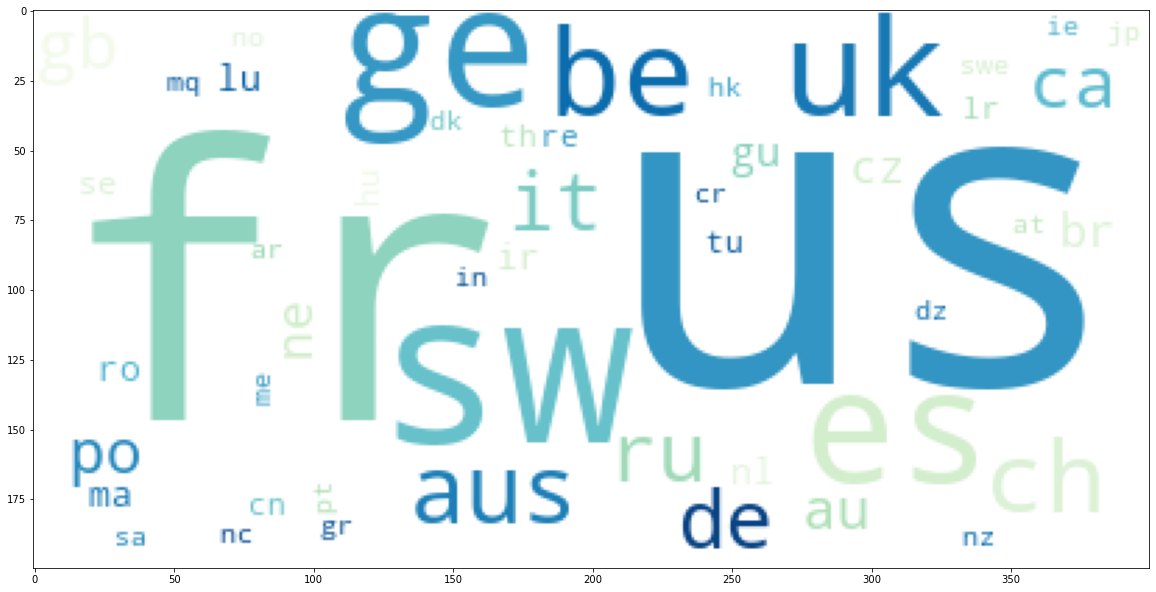

In [17]:
#On unnest la colonne countries pour pouvoir compter les valeurs par pays
l_countries = data['countries'].explode()

dic_countries = {}

for i, e in enumerate(l_countries.value_counts()[0:50]):
    dic_countries[l_countries.value_counts().index[i]] = e
    
wc_top_countries =  WordCloud(background_color='white', colormap='GnBu').generate_from_frequencies(dic_countries)

plt.figure(figsize=(20, 16))
plt.imshow(wc_top_countries)
plt.show()

### Variables relatives au temps

In [18]:
data.head()

,Unnamed: 0,nutrition-score-fr_100g,created_datetime,last_modified_datetime,product_name,countries,additives_n,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g,main_category
0,0,2.792462,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,Farine de blé noir,[fr],1.0,3.60,1.64,0.32500,310.0,0.5,0.0,0.8,9.00,juice-beverage
1,1,2.792462,2017-03-09 10:35:13+00:00,2017-03-09 10:35:13+00:00,Real Salt Granular,[us],0.0,3.60,1.64,96.15678,310.0,0.5,0.0,0.8,9.00,juice-beverage
2,2,2.104444,2015-06-17 08:45:04+00:00,2015-06-17 10:11:54+00:00,Filet de bœuf,[fr],1.0,3.60,1.64,0.32500,310.0,0.5,0.0,0.8,9.00,filet-de-boeuf
3,3,2.792462,2017-03-09 10:35:30+00:00,2017-03-09 10:35:30+00:00,Organic Small Red Chili Beans,[us],0.0,2.78,22.22,0.17526,699.0,0.5,0.0,44.4,63.89,juice-beverage
4,4,2.792462,2017-03-09 10:35:09+00:00,2017-03-09 10:35:09+00:00,Fine Sea Salt,[us],0.0,3.60,1.64,99.90582,310.0,0.5,0.0,0.8,9.00,juice-beverage


<AxesSubplot:xlabel='created_datetime', ylabel='Count'>

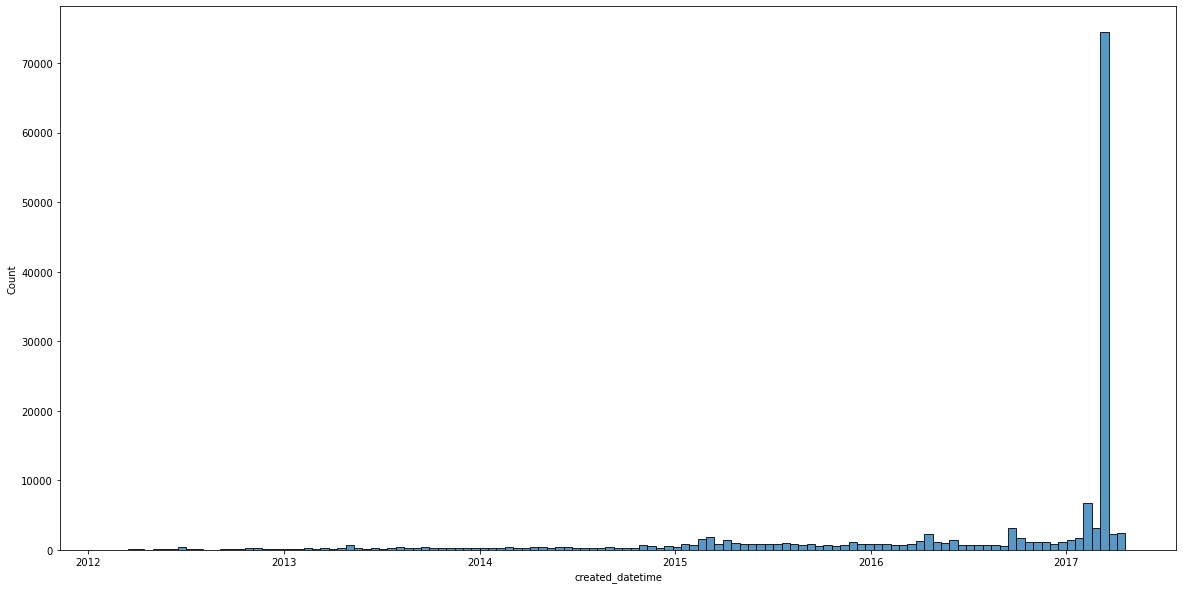

In [19]:
plt.figure(figsize=(20,10))
sns.histplot(data['created_datetime'])

Ici, on a un graphique très intéressant. On observe une tendance générale à l'augmentation du nombre de produits ajoutés à la base de données. En outre, on observe un gros pic de remplissage en 2017. Il serait intéressant de se renseigner pour savoir à quoi correspond ce pic (Yuka ?).

<AxesSubplot:xlabel='last_modified_datetime', ylabel='Count'>

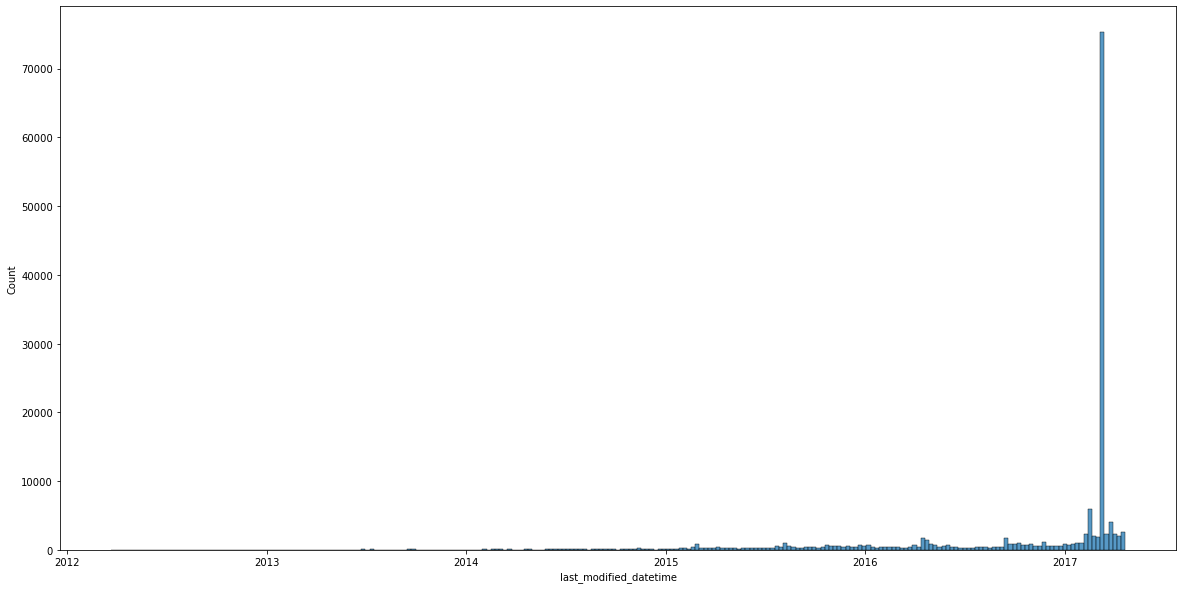

In [20]:
plt.figure(figsize=(20,10))
sns.histplot(data['last_modified_datetime'])

Là encore, on observe une augmentation du nombre de modifications avec le temps. On observe également un pic de modification des valeurs au milieu de l'année 2017.

### ANALYSE BIVARIÉE 

Ici, on va pouvoir répondre à des questions plus fines et intéressantes en mettant en perspective différentes variables. En terme de méthodes, il nous faut procéder en distinguant:

- Pour deux variables quantitatives ;
- Pour deux variables qualitatives ;
- Pour une variable qualitative et une variable quantitative ;
- Pour les variables relatives au temps.


QUESTIONS 
Il faut également procéder en ayant à l'esprit des questions précises :

- Y'a-t-il des corrélations entre les différentes variables numériques ?
- Y'a-t-il un lien entre catégorie de produits et lieux de commercialisation ?
- Y'a-t un lien entre catégorie de produits et nutriscore ? Entre lieux de commercialisation et nutriscore ?
- Comment évoluent les indicateurs de qualité avec le temps ?(score de nutrition, nombre d'additifs)

### Y'a-t-il des corrélations entre les différentes variables numériques ?

<AxesSubplot:>

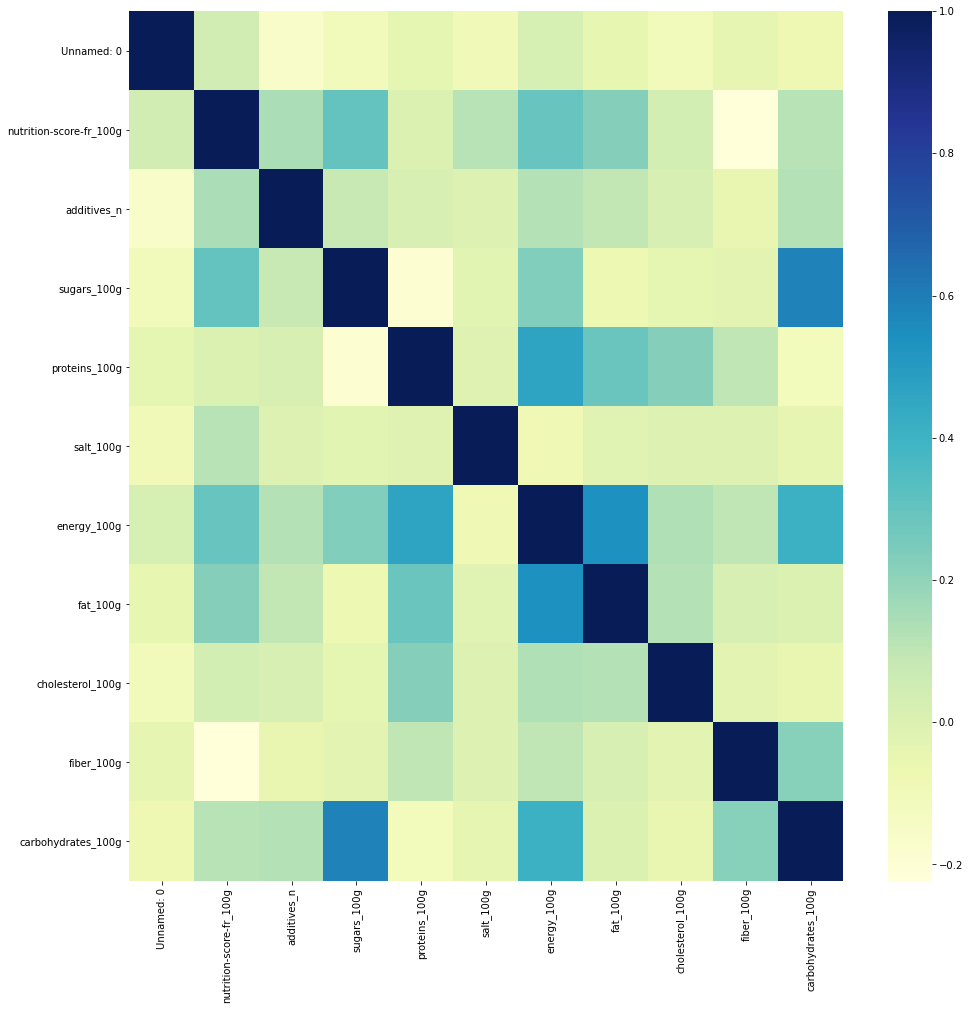

In [21]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), cmap="YlGnBu")

On voit que le score de nutrition est corrélé avec les variables energy_100g, fat_100g, sugars_100g, et additives_n. On a également de fortes corrélations entre sugars_100g et carbohydrates_100g, d'une part, et energy_100g et fat_100g d'autre part. On note enfin une corrélation moins forte, mais significative, entre energy_100g et carbohydrates_100g.

### Y'a-t-il un lien entre catégorie de produits et lieux de commercialisation ?

In [22]:
df_cat = data[['countries', 'main_category']]

#On unnest la colonne countries pour pouvoir compter les valeurs par pays
df_cat = df_cat.explode('countries', ignore_index=True)

/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32654 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/

<AxesSubplot:xlabel='countries', ylabel='main_category'>

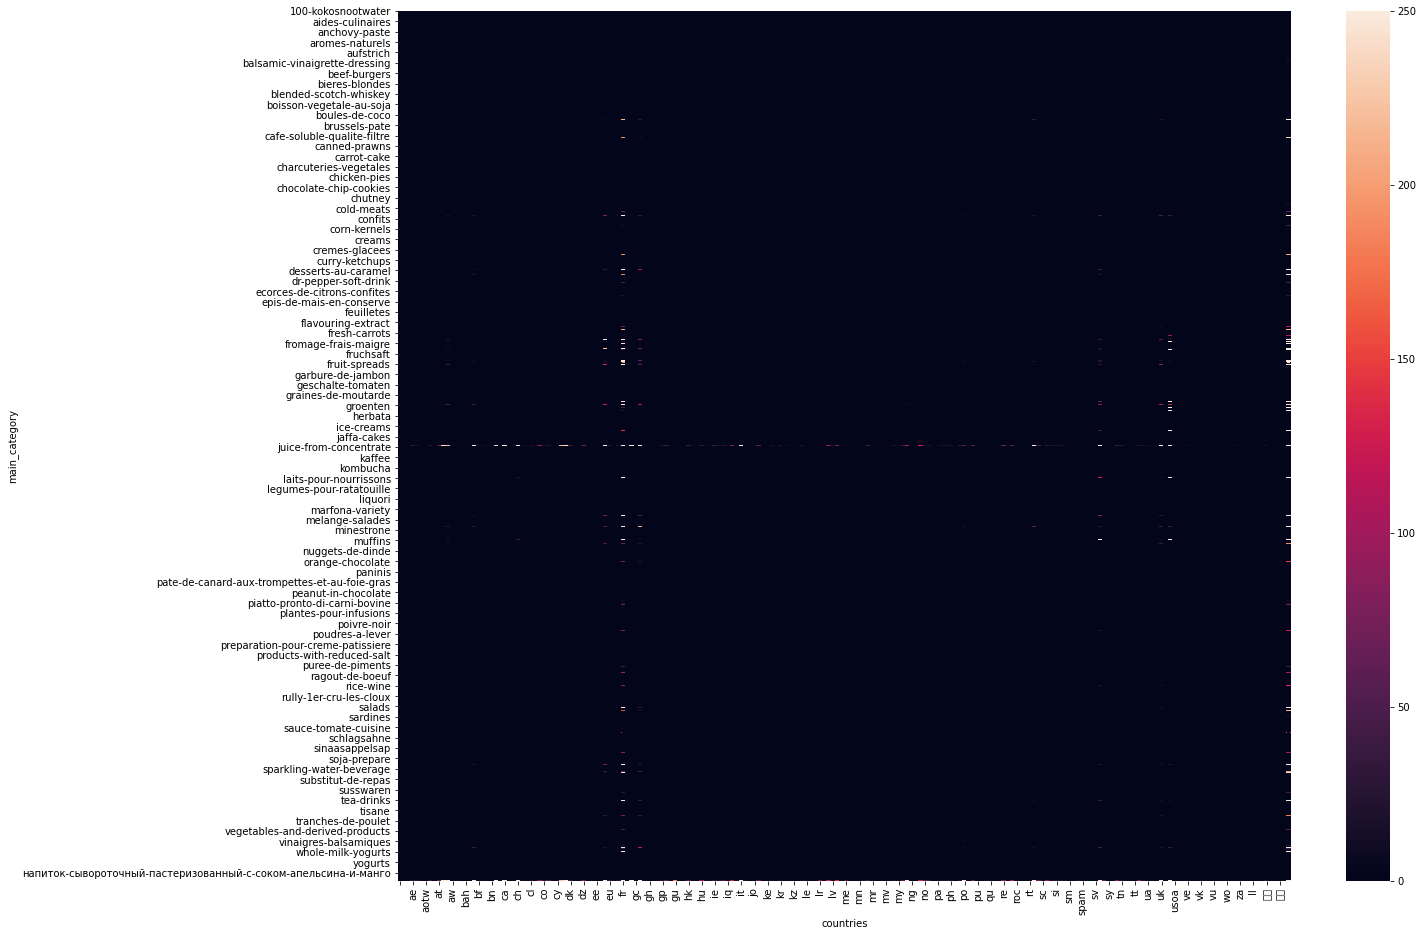

In [23]:
data_crosstab = pd.crosstab(df_cat['main_category'],  
                            df_cat['countries'],
                           margins='total') 

plt.figure(figsize=(20,16))
sns.heatmap(data_crosstab, vmin=0, vmax=250)

Au vu du nombre de valeurs possibles pour chacune des deux variables, il est assez difficile de visualiser les résultats de cette table de contingence. Cependant, elle montre qu'il existe un lien indéniable entre catégorie de produits et lieux de commercialisation, notamment pour certaines catégories de produits commercialisésdans beaucoup de pays différents (juice-from-concentrate) ou pour certains pays ou de nombreuses catégories de produits différentes sont commercialisées (fr, us).

### Y'a-t un lien entre catégorie de produits et nutriscore ?

In [24]:
import random

top_categories = [e for e in data['main_category'].value_counts()[0:100].index]
product_index = []

for el in top_categories:
    random.seed(0)
    #On prend 100 individus au hasard pour chacune de nos top catégories
    for e in random.sample(list(data[data['main_category'] == el].index),100):
        product_index.append(e)


sample_df = data[data.index.isin(product_index)][['main_category', 'nutrition-score-fr_100g']].reset_index(drop=True)

sample_df.head()


,main_category,nutrition-score-fr_100g
0,breads,-1.646222
1,teas,2.683556
2,fruit-sodas,13.000000
3,condiments,3.720444
4,fromage-frais,-7.000000


In [25]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

Hypothèse nulle : La catégorie de produits n'a pas d'impact sur le nutriscore.
Pour tester cette hypothèse, on va effecture un test d'Anova.

In [26]:
df_anova = sample_df.copy()
df_anova.insert(0, 'index', df_anova.index)
df_anova.columns = ['index', 'treatments', 'value']
df_anova.head()

,index,treatments,value
0,0,breads,-1.646222
1,1,teas,2.683556
2,2,fruit-sodas,13.000000
3,3,condiments,3.720444
4,4,fromage-frais,-7.000000


In [27]:
model = ols('value ~ C(treatments)', data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),255212.437502,99.0,308.309561,0.0
Residual,82777.983565,9900.0,NaN,NaN


In [28]:
res = stat()
res.anova_stat(df=df_anova, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),99.0,255212.437502,2577.903409,308.309561,0.0
Residual,9900.0,82777.983565,8.361412,NaN,NaN


P est égal à 0. L'hypothèse nulle est rejetée. 

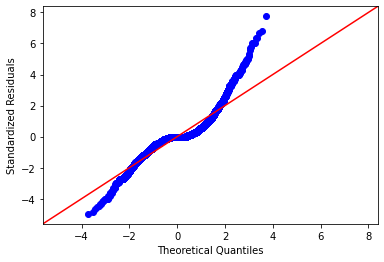

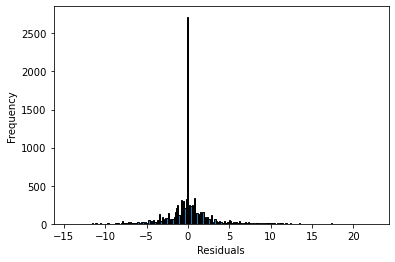

In [29]:
sm.qqplot(res.anova_std_residuals, line='45')

plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

### Entre lieux de commercialisation et nutriscore ?

Hypothèse nulle : Le lieu de commercialisation n'a pas d'impact sur le nutriscore.

In [30]:
import random

#On unnest la colonne countries pour pouvoir compter les valeurs par pays
data_countries = data.explode('countries', ignore_index=True)

top_countries = [e for e in data_countries['countries'].value_counts()[0:40].index]
product_index = []

for el in top_countries:
    random.seed(0)
    #On prend 100 individus au hasard pour chacune de nos top catégories
    for e in random.sample(list(data_countries[data_countries['countries'] == el].index),50):
        product_index.append(e)


sample_df_2 = data_countries[data_countries.index.isin(product_index)][['countries', 'nutrition-score-fr_100g']].reset_index(drop=True)

sample_df_2.head()

,countries,nutrition-score-fr_100g
0,gb,2.792462
1,ca,3.095556
2,uk,-0.052889
3,us,12.000000
4,ne,2.792462


In [31]:
df_anova_2 = sample_df_2.copy()
df_anova_2.insert(0, 'index', df_anova_2.index)
df_anova_2.columns = ['index', 'treatments', 'value']
df_anova_2.head()

,index,treatments,value
0,0,gb,2.792462
1,1,ca,3.095556
2,2,uk,-0.052889
3,3,us,12.000000
4,4,ne,2.792462


In [32]:
model_2 = ols('value ~ C(treatments)', data=df_anova_2).fit()
anova_table_2 = sm.stats.anova_lm(model_2, typ=2)
anova_table_2

,sum_sq,df,F,PR(>F)
C(treatments),1308.761084,39.0,3.249855,8.815991e-11
Residual,20238.941402,1960.0,NaN,NaN


In [33]:
res_2 = stat()
res_2.anova_stat(df=df_anova_2, res_var='value', anova_model='value ~ C(treatments)')
res_2.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),39.0,1308.761084,33.557977,3.249855,8.815991e-11
Residual,1960.0,20238.941402,10.325991,NaN,NaN


P est presque égal à 0. L'hypothèse nulle est rejetée.

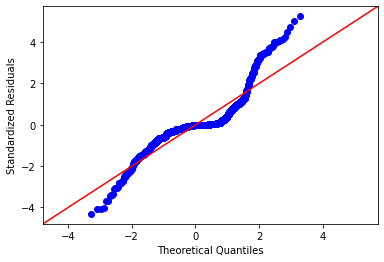

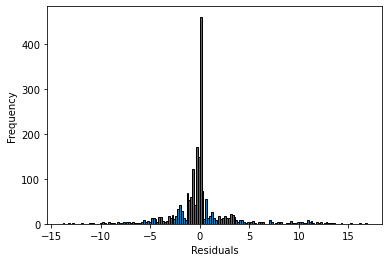

In [34]:
sm.qqplot(res_2.anova_std_residuals, line='45')

plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res_2.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


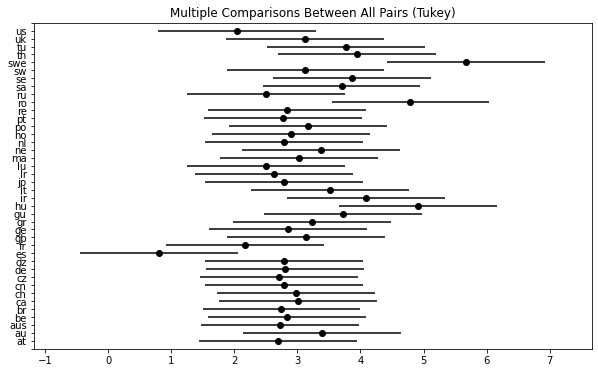

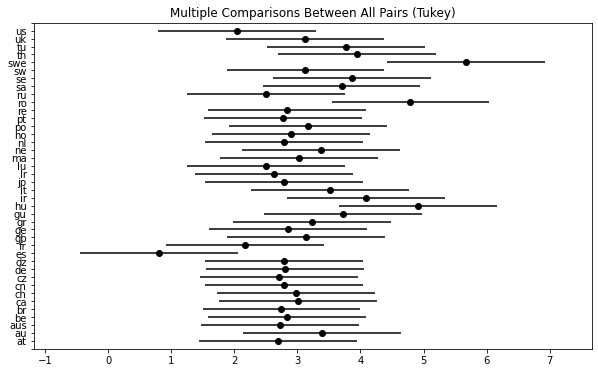

In [35]:
mc = sm.stats.multicomp.MultiComparison(sample_df_2['nutrition-score-fr_100g'],sample_df_2['countries'])
mc_results = mc.tukeyhsd()
mc_results.plot_simultaneous()

### Quels sont les nutriments les plus présents en moyenne par pays ?

In [36]:
#On ne garde que les colonnes 'countries' et celles qui concernent les nutriments
l_col = ['countries', 'sugars_100g', 'proteins_100g', 'salt_100g', 'energy_100g', 'fat_100g', 'cholesterol_100g', 'fiber_100g', 'carbohydrates_100g']
df_countries = data[l_col]
df_countries.head()

,countries,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g
0,[fr],3.60,1.64,0.32500,310.0,0.5,0.0,0.8,9.00
1,[us],3.60,1.64,96.15678,310.0,0.5,0.0,0.8,9.00
2,[fr],3.60,1.64,0.32500,310.0,0.5,0.0,0.8,9.00
3,[us],2.78,22.22,0.17526,699.0,0.5,0.0,44.4,63.89
4,[us],3.60,1.64,99.90582,310.0,0.5,0.0,0.8,9.00


In [37]:
#On unnest la colonne countries pour pouvoir compter les valeurs par pays
df_countries = df_countries.explode('countries', ignore_index=True)

In [38]:
#On regroupe les informations nutritionnelles par pays
df = df_countries.groupby('countries').mean()

#Pour chaque colonne, on divise chaque valeur par la valeur maoyenne pour cette colonne
for col in ['sugars_100g', 'proteins_100g', 'salt_100g', 'fat_100g', 'cholesterol_100g', 'fiber_100g', 'carbohydrates_100g']:
    df[col] = df[col].map(lambda x: x/df[col].mean())
df['energy_100g'] = df['energy_100g'].map(lambda x: x/df['energy_100g'].mean())

df.head()

,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g
countries,,,,,,,,
,0.906795,2.357225,0.224064,1.651229,9.250283,0.0,0.000000,0.407456
7p,0.317378,17.914911,8.821435,2.652069,4.162627,0.0,0.967563,0.162983
ad,0.816115,0.773170,0.573393,0.978740,0.462514,0.0,0.967563,0.916777
ae,0.816115,0.773170,0.573393,0.978740,0.462514,0.0,0.967563,0.916777
al,0.838452,0.861496,0.526621,0.912965,0.574606,0.0,0.878633,0.885768


In [39]:
index_top_countries = []
for i, e in enumerate(df.index):
    if e in top_countries:
        index_top_countries.append(i)

<AxesSubplot:ylabel='countries'>

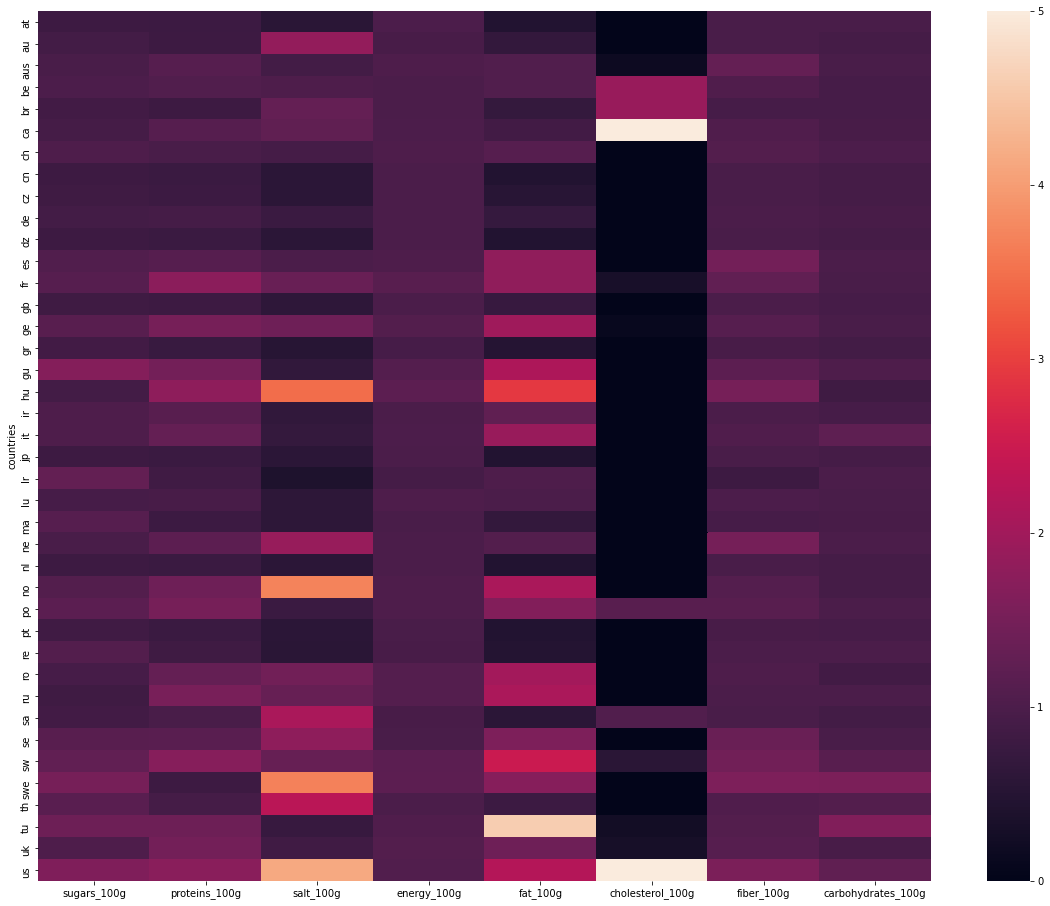

In [40]:
plt.figure(figsize=(20,16))
sns.heatmap(df.iloc[index_top_countries], vmin=0, vmax=5)

Cette visualisation est très intéressante : elle permet de voir que les nutriments ne sont pas également représentés en moyenne en fonction des pays. Ainsi, les produits commercialisés aux Etats-Unis sont plus salés, plus gras et possèdent plus de cholesterol en moyenne. En Italie, les produits commercialisés sont nettement moins salés, mais assez gras en moyenne. A l'inverse, aux Pays-Bas, les produits sont assez peu gras mais relativement salés.

### Comment évoluent les indicateurs de qualité avec le temps ?

In [41]:
pd.DataFrame(data['nutrition-score-fr_100g'].groupby(data['created_datetime'].dt.year).mean())

,nutrition-score-fr_100g
created_datetime,
2012,2.884592
2013,2.804878
2014,2.954976
2015,3.004033
2016,3.013559
2017,2.777551


/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<AxesSubplot:xlabel='created_datetime'>

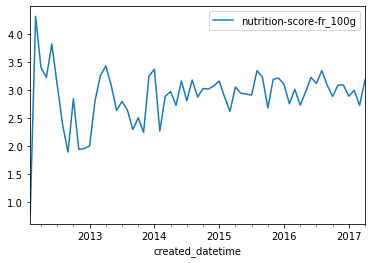

In [42]:
dt_nutriscore = pd.DataFrame(data['nutrition-score-fr_100g'].groupby(data['created_datetime'].dt.to_period('M')).mean())
dt_nutriscore.plot()

Contrairement à ce qu'on pourrait penser, on observe plutôt une hausse du nutriscore au fil du temps - et donc à une dégradation de la qualité nutritive des produits. Attention, ces dates correspondent à la date d'ajout du produit à la base de données, et pas à celles de création du produit. On peut par exemple imaginer que les producteurs ayant plus intérêt à mettre en avant les informations nutritionnelles de leurs produits ont renseigné leur produit sur la base de données plus rapidement.

In [43]:
pd.DataFrame(data['additives_n'].groupby(data['created_datetime'].dt.year).mean())

,additives_n
created_datetime,
2012,1.392614
2013,1.319266
2014,1.334893
2015,1.319315
2016,1.164894
2017,1.659460


/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<AxesSubplot:xlabel='created_datetime'>

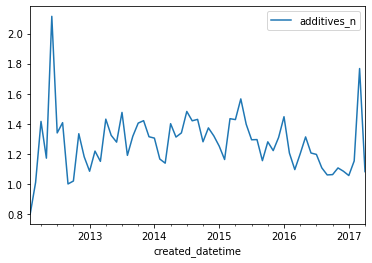

In [44]:
dt_nutriscore = pd.DataFrame(data['additives_n'].groupby(data['created_datetime'].dt.to_period('M')).mean())
dt_nutriscore.plot()

A l'inverse, on semble assister à une tendance générale - quoique légèrement marquée - à la baisse pour le nombre d'additifs.

Ici, il va être intéressant de se poser les mêmes questions avec la date de la dernière modification du produit. Les produits modifiés le plus récemment présentent-ils de meilleurs indicateurs nutritionnels ?

In [45]:
pd.DataFrame(data['nutrition-score-fr_100g'].groupby(data['last_modified_datetime'].dt.year).mean())

,nutrition-score-fr_100g
last_modified_datetime,
2012,3.674359
2013,3.099488
2014,2.831472
2015,2.848824
2016,3.035365
2017,2.809067


/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<AxesSubplot:xlabel='last_modified_datetime'>

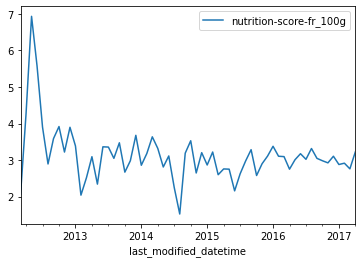

In [46]:
dt_nutriscore = pd.DataFrame(data['nutrition-score-fr_100g'].groupby(data['last_modified_datetime'].dt.to_period('M')).mean())
dt_nutriscore.plot()

In [47]:
pd.DataFrame(data['additives_n'].groupby(data['last_modified_datetime'].dt.year).mean())

,additives_n
last_modified_datetime,
2012,1.456446
2013,1.305936
2014,1.274942
2015,1.368459
2016,1.182245
2017,1.615475


/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<AxesSubplot:xlabel='last_modified_datetime'>

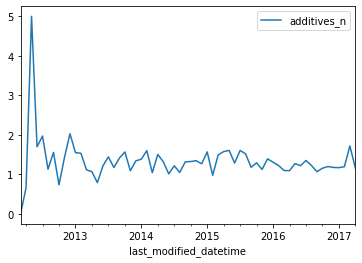

In [48]:
dt_nutriscore = pd.DataFrame(data['additives_n'].groupby(data['last_modified_datetime'].dt.to_period('M')).mean())
dt_nutriscore.plot()

Ces observations confirment nos intuitions : les produits modifiés plus récemment présentent, en moyenne, un meilleur nutriscore, et un nombre d'additifs inférieur.

### Y'a-t-il une grande diversité de paramètres différents pour un même produit ?

Pour vérifier, regardons comment sont dispersés les différents indicateurs nutritionnels pour les 3 produits les plus représentés de nos données.

In [49]:
#On ne garde que les colonnes 'product_name' et celles qui concernent les nutriments
l_col_product = ['product_name', 'sugars_100g', 'proteins_100g', 'salt_100g', 'energy_100g', 'fat_100g', 'cholesterol_100g', 'fiber_100g', 'carbohydrates_100g']
df_product = data[l_col_product]
df_product.head()

,product_name,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g
0,Farine de blé noir,3.60,1.64,0.32500,310.0,0.5,0.0,0.8,9.00
1,Real Salt Granular,3.60,1.64,96.15678,310.0,0.5,0.0,0.8,9.00
2,Filet de bœuf,3.60,1.64,0.32500,310.0,0.5,0.0,0.8,9.00
3,Organic Small Red Chili Beans,2.78,22.22,0.17526,699.0,0.5,0.0,44.4,63.89
4,Fine Sea Salt,3.60,1.64,99.90582,310.0,0.5,0.0,0.8,9.00


In [50]:
df_product['product_name'].value_counts()[0:3]

Ice Cream         203
Tomato Ketchup    180
Salsa             150
Name: product_name, dtype: int64

In [51]:
top_product = df_product['product_name'].value_counts()[0:3].index

In [52]:
dic_top_product = {}
for k in top_product:
    l = []
    for i, e in enumerate(df_product['product_name']):
        if e == k:
            l.append(i)
    dic_top_product[k] = l

On exécute cette ligne pour activer le toggle scrolling et obtenir une meilleure visualisation des figures suivantes.

In [53]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

<Figure size 432x288 with 0 Axes>

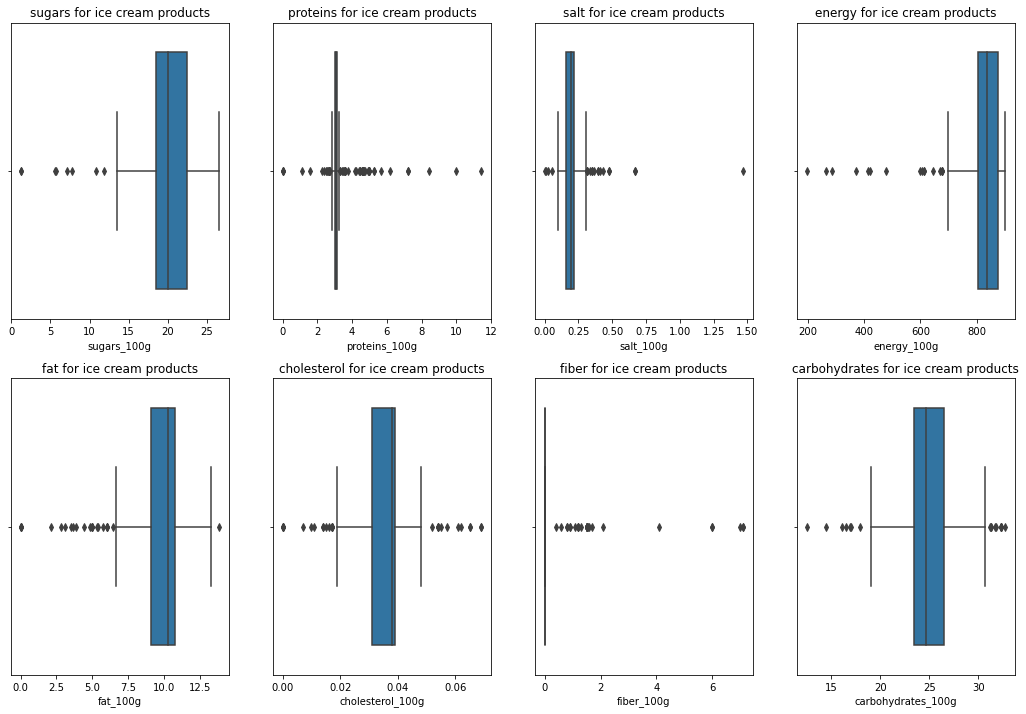

<Figure size 432x288 with 0 Axes>

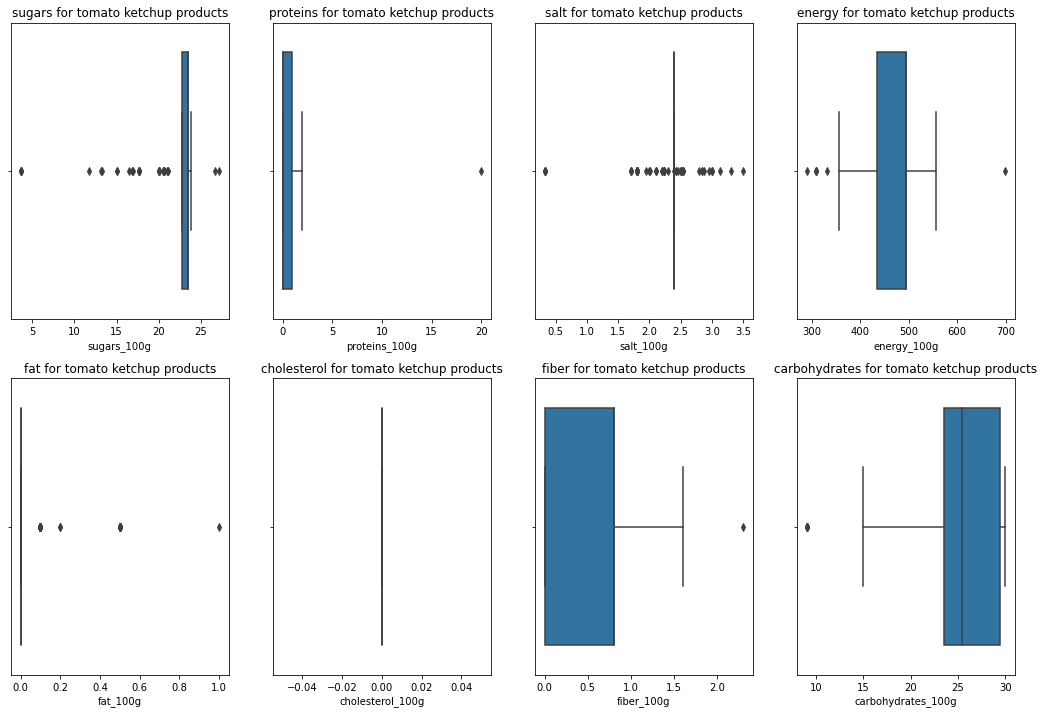

<Figure size 432x288 with 0 Axes>

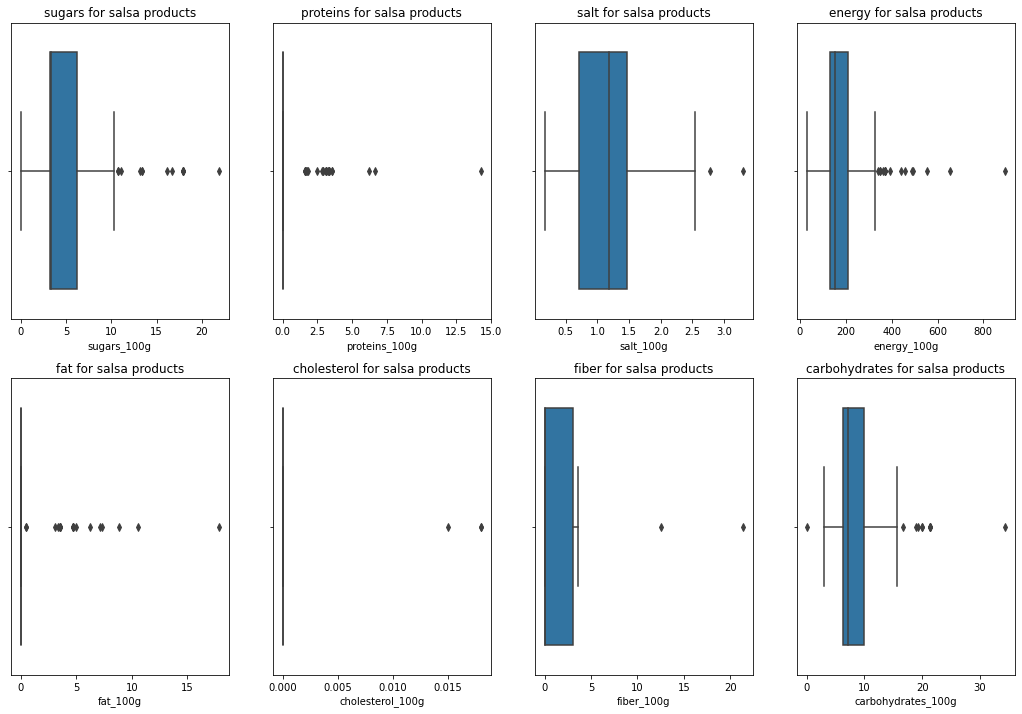

In [54]:
for k in top_product:
    plt.figure()
    fig, axes = plt.subplots(2, 4, figsize=(18,12))
    for i, e in enumerate(['sugars_100g', 'proteins_100g', 'salt_100g', 'energy_100g', 'fat_100g', 'cholesterol_100g', 'fiber_100g', 'carbohydrates_100g']):
        sns.boxplot(df_product.iloc[dic_top_product[k]][e], ax=axes[i//4, i%4]).set_title(f'{e[:-5]} for {k.lower()} products')

Une fois de plus, on obtient une visualisation très intéressante. Elle permet de confirmer qu'il existe eune grande diversité de paramètres nutritionnels différents pour un même produit et donc un large éventail d'alternatives à proposer, en fonction du profil et des besoins spécifiques de l'utilisateur. Par exemple, les produits dont le nom est 'Ice Cream' sont en moyenne assez grass et sucrés, mais il est possible de trouver des exemples de produits avec très peu de gras et de sucre.

### ANALYSE MULTIVARIÉE

On va avoir recours à l'Analyse en Composantes Principales (ACP). On va travailler sur les variables numériques et sur les variables catégorielles countries et main_category. Il nous faudra encoder les variables catégorielles avec un OneHotEncoder avant de réaliser l'ACP.

In [55]:
from functions import *
from sklearn import decomposition
from sklearn import preprocessing

In [56]:
numerical_col = ['nutrition-score-fr_100g',
           'additives_n',
           'sugars_100g',
           'proteins_100g',
           'salt_100g',
           'energy_100g',
           'fat_100g',
           'cholesterol_100g',
           'fiber_100g',
           'carbohydrates_100g',
                ]

In [57]:
#On récupère les variables countries et main_category dans un nouveau dataframe
pca_categorical_data = data[['main_category', 'countries']].copy()

#On convertit la colonne countries en string pour pouvoir l'encoder
pca_categorical_data['countries'] = pca_categorical_data['countries'].map(str)

#On utilise get_dummies pour encoder en OneHot les colonnes main_category et countries
pca_categorical_data = pd.get_dummies(pca_categorical_data)

#On récupère les variables numériques dans un nouveau dataframe
pca_numerical_data = data[numerical_col]

#On concatène les deux dataframes
pca_data = pd.concat([pca_numerical_data, pca_categorical_data], axis=1, verify_integrity=True)

In [58]:
pca_data.head()

,nutrition-score-fr_100g,additives_n,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g,...,countries_['ای'],countries_['سع'],"countries_['日本', '日本', 'us']","countries_['日本', '日本']",countries_['日本'],"countries_['法国', 're']",countries_['澳门'],"countries_['香港', 'us']","countries_['香港', '美国']",countries_['香港']
0,2.792462,1.0,3.60,1.64,0.32500,310.0,0.5,0.0,0.8,9.00,...,0,0,0,0,0,0,0,0,0,0
1,2.792462,0.0,3.60,1.64,96.15678,310.0,0.5,0.0,0.8,9.00,...,0,0,0,0,0,0,0,0,0,0
2,2.104444,1.0,3.60,1.64,0.32500,310.0,0.5,0.0,0.8,9.00,...,0,0,0,0,0,0,0,0,0,0
3,2.792462,0.0,2.78,22.22,0.17526,699.0,0.5,0.0,44.4,63.89,...,0,0,0,0,0,0,0,0,0,0
4,2.792462,0.0,3.60,1.64,99.90582,310.0,0.5,0.0,0.8,9.00,...,0,0,0,0,0,0,0,0,0,0


On propose une deuxième version d'encodage en unnestant la colonne countries.

In [59]:
#Pourquoi ne pas retirer la colonne countries

In [60]:
pca_col = ['nutrition-score-fr_100g',
           'additives_n',
           'sugars_100g',
           'proteins_100g',
           'salt_100g',
           'energy_100g',
           'fat_100g',
           'cholesterol_100g',
           'fiber_100g',
           'carbohydrates_100g',
           'main_category',
           'countries'
                ]

df_pca = data[pca_col]

#On unnest la colonne countries pour pouvoir compter les valeurs par pays
df_pca = df_pca.explode('countries', ignore_index=True)

In [61]:
#On récupère les variables countries et main_category dans un nouveau dataframe
pca_categorical_data_2 = df_pca[['main_category', 'countries']].copy()

#On utilise get_dummies pour encoder en OneHot les colonnes main_category et countries
pca_categorical_data_2 = pd.get_dummies(pca_categorical_data_2)

#On récupère les variables numériques dans un nouveau dataframe
pca_numerical_data_2 = df_pca[numerical_col]

#On concatène les deux dataframes
pca_data_2 = pd.concat([pca_numerical_data_2, pca_categorical_data_2], axis=1, verify_integrity=True)

In [62]:
pca_data_2.head()

,nutrition-score-fr_100g,additives_n,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g,...,countries_ссср,countries_цг,countries_اا,countries_ای,countries_سع,countries_日本,countries_法国,countries_澳门,countries_美国,countries_香港
0,2.792462,1.0,3.60,1.64,0.32500,310.0,0.5,0.0,0.8,9.00,...,0,0,0,0,0,0,0,0,0,0
1,2.792462,0.0,3.60,1.64,96.15678,310.0,0.5,0.0,0.8,9.00,...,0,0,0,0,0,0,0,0,0,0
2,2.104444,1.0,3.60,1.64,0.32500,310.0,0.5,0.0,0.8,9.00,...,0,0,0,0,0,0,0,0,0,0
3,2.792462,0.0,2.78,22.22,0.17526,699.0,0.5,0.0,44.4,63.89,...,0,0,0,0,0,0,0,0,0,0
4,2.792462,0.0,3.60,1.64,99.90582,310.0,0.5,0.0,0.8,9.00,...,0,0,0,0,0,0,0,0,0,0


In [63]:
names = pca_data_2.index #On conserve les index des produits
features = pca_data_2.columns #On conserve le nom des varialbes

In [64]:
X = pca_data_2.values #On convertit les données des colonnes numériques en un array numpy

In [65]:
#Centrage et Réduction
skaler = preprocessing.StandardScaler()

X_scaled = skaler.fit_transform(X)

In [66]:
#On calcule les composantes principales pour n_comp=4
n_comp = 4

pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=4)

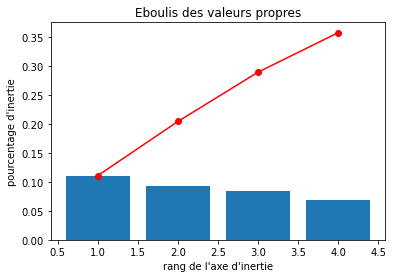

In [67]:
#Eboulis des valeurs propres
display_scree_plot(pca)

Ce graphique montre que nos 4 axes expriment près de 40% de la variabilité des données. On a donc un modèle explicatif relativement limité. On va tout de même essayer de l'interpréter.

### Cercle de corrélations

Ici, on va rencontrer un problème pour la visualisation du cercle de corrélation. On propose donc de reprendre le code source de la fonction display_circles proposée dans les ressources du cours d'Open Classroom, pour en écrire une deuxième version permettant de limiter le nombre de features affichés

In [68]:
def display_circles_v2(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None, max_features=20):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(20,16))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            else :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
                
            #On calcule la valeur max du n-ième terme de la liste des sommes triée par ordre décroissant
            max_value = sorted([abs(x)+abs(y) for x,y in pcs[[d1,d2]].T], reverse=True)[max_features]
            # On affiche seulement les features dont la somme de la valeur absolue des coeffs de corrélations dépasse la valeur max 
            lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T if abs(x)+abs(y) > max_value]
            ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, linewidths=7, color='purple'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if abs(x) + abs(y) > max_value:
                        if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                            plt.text(x, y, labels[i], fontsize='16', ha='center', va='center', rotation=label_rotation, color="black", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')
            
            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{}'.format(d1+1))
            plt.ylabel('F{}'.format(d2+1))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

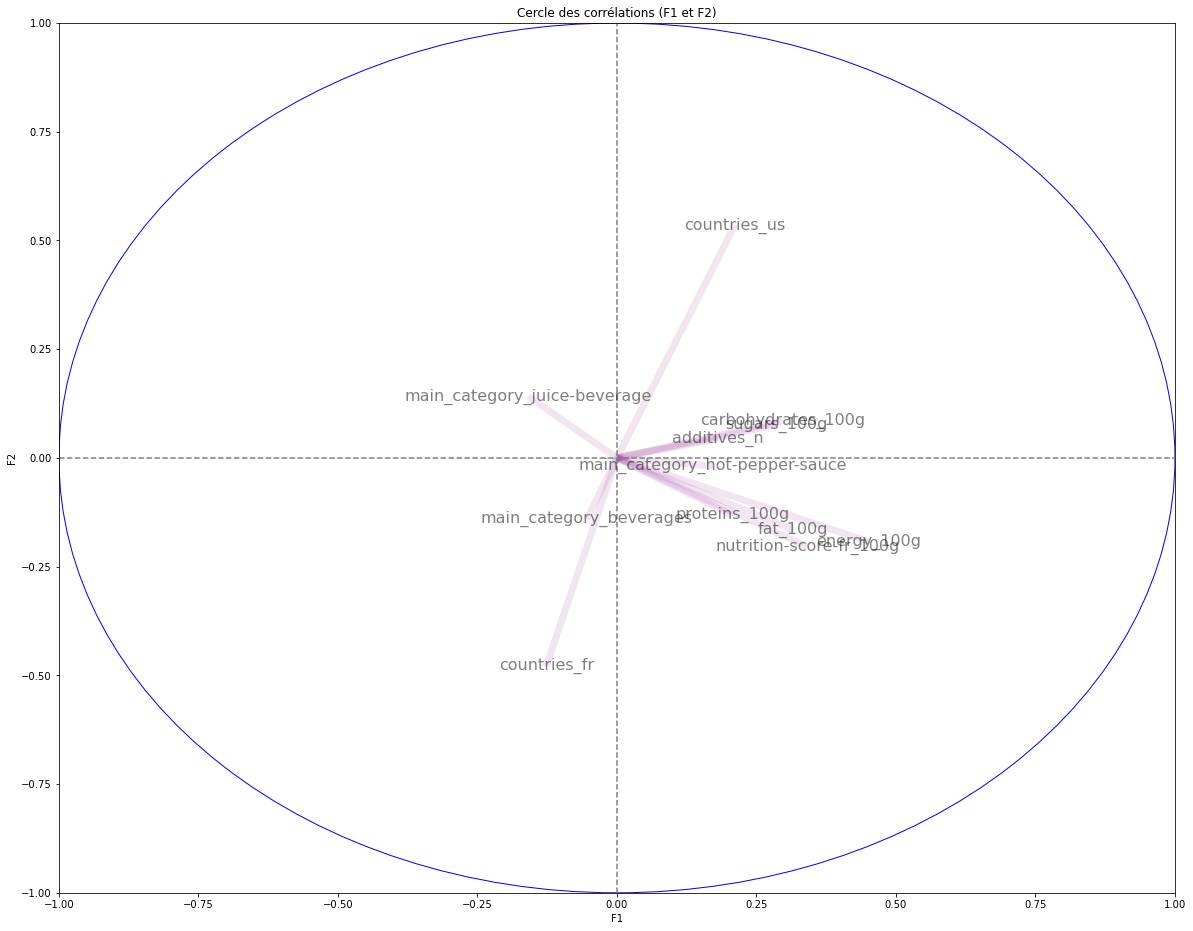

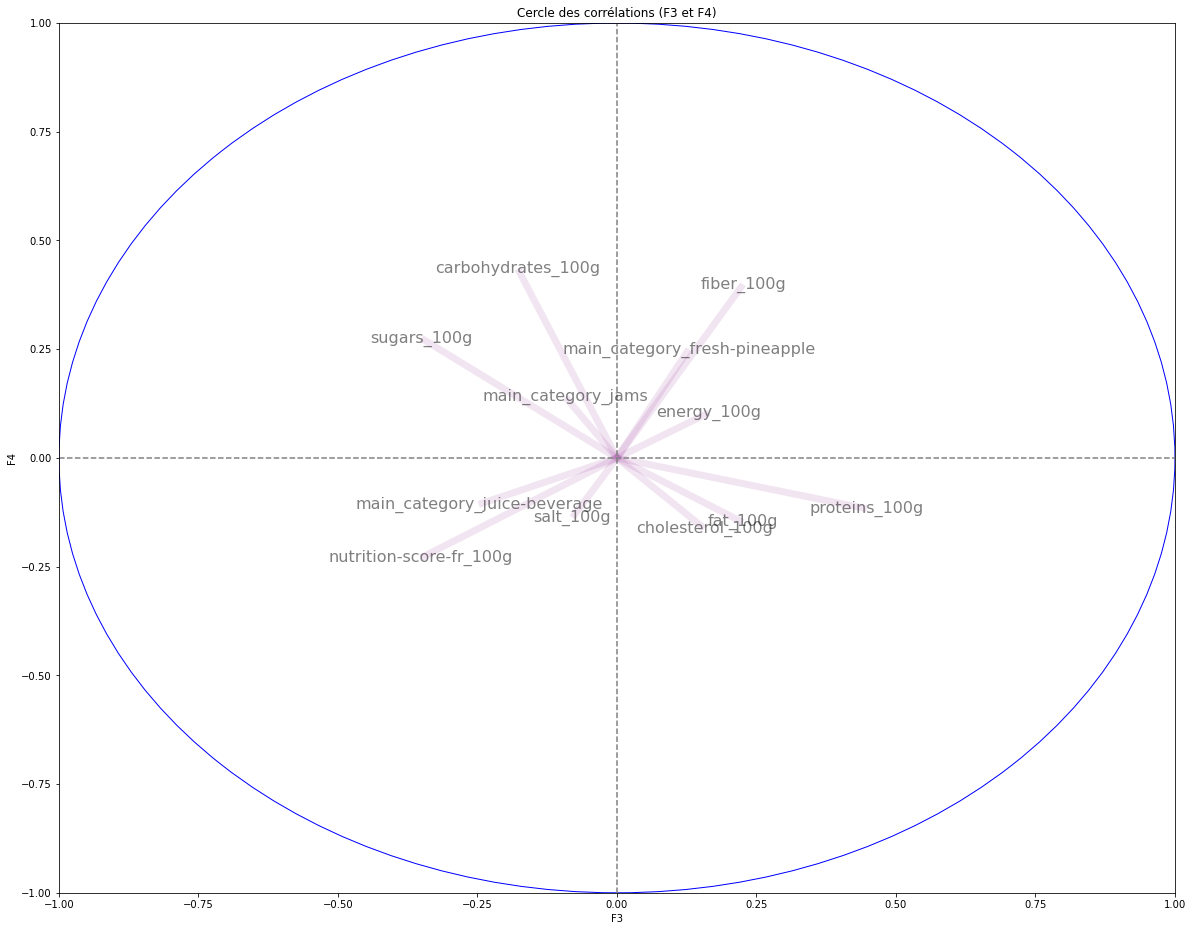

In [69]:
components = pca.components_

display_circles_v2(components, n_comp, pca, [(0, 1), (2, 3)], labels=np.array(features), max_features=12)

A partir de ce diagramme, on peut identifier les axes suivants :

- F1 semble être marqué par la division entre produits français et produits des états-unis
- F2 correspond à la distinction entre produits à hautes valeurs d'indicateurs nutritionnels et produits à faibles valeurs
- F3 et F4 marquent la distinction entre produits avec un bon score nutritionnel et produits très protéiques et riches (gras, cholesterol) d'une part, produits avec beaucoup de sucres (comme les produits de la catégorie 'jam'), et produits fibreux (comme les produits de la catégorie 'fresh pineapple')

Ici, on peut voir les différents axes et la part explicative de chaque variable pour cet axe. On peut essayer d'expliquer chacun de ces axes à partir de sa composition :

### Projection des produits sur les plans factoriels

On peut désormais projeter nos produits sur ces axes nouvellement définis.

In [70]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(20,16))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-10,10])
            plt.ylim([-10,10])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

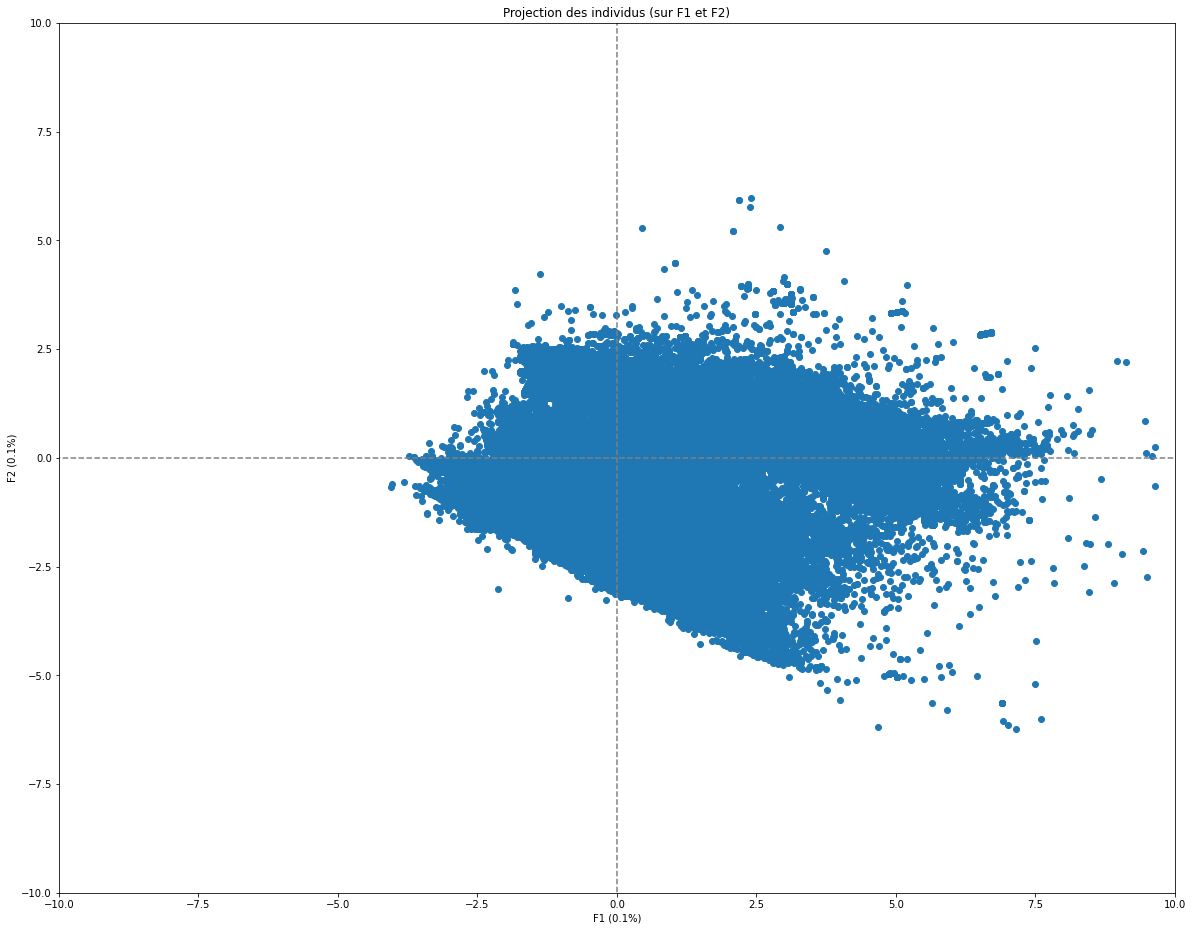

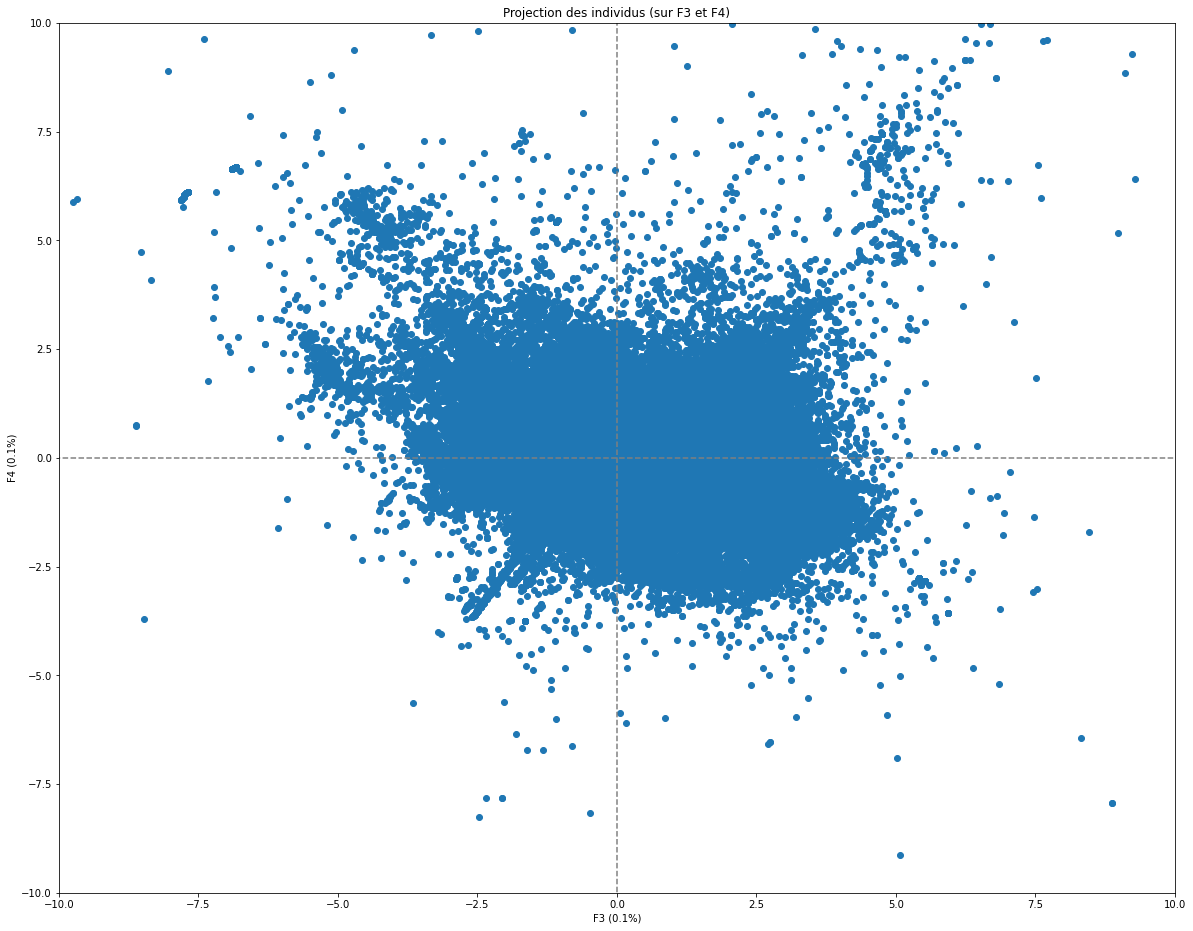

In [71]:
#Projection des produits
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0, 1), (2, 3)], labels=np.array(names))

### Faits marquants pour notre application

- Une forte croissance et un rythme soutenu de mise à jour de la base de données qui signifie qu’il y aura toujours plus d’alternatives en termes de produits alimentaires à proposer à nos utilisateurs en fonction de leur profil.
- Pour un même ensemble de produits, on dispose d’un large éventail de paramètres nutritionnels différents, qui signifient autant d’alternatives personnalisées à proposer à nos utilisateurs pour s’adapter à leurs objectifs.
- Utiliser le jeu de données pour créer un modèle de suggestion en créant un modèle de clustering pour identifier les produits voisins ainsi qu'un algorithme de reccomandation pour faire des suggestions adaptées au profil de l'utilisateur.